In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
fpath = 'C:/Users/zambr/OneDrive/Escritorio/7mo Semestre/Dataset Mineria/Dataset3'

random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))
TAMANO_IMG = 224

List of categories =  ['ojosAbiertos', 'ojosCerrados'] 

No. of categories =  2


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread((fpath+"/"+category+"/"+image_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            #img = img.reshape(TAMANO_IMG, TAMANO_IMG, 1) 
            img_lst.append(np.array(img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  7166 
No. of labels loaded =  7166
<class 'list'> <class 'list'>


In [4]:
images = np.array(images).reshape(-1, TAMANO_IMG, TAMANO_IMG, 3)

In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (7166, 224, 224, 3) 
Labels shape =  (7166,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


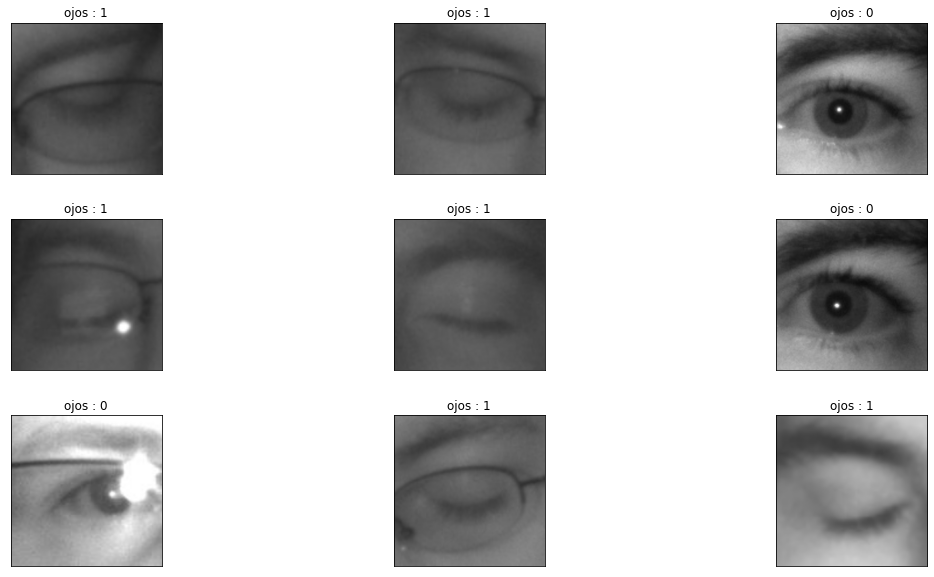

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('ojos : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

Prepare data for training the CNN model

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 7163 7164 7165]

'n' values after shuffling =  [3129 3163 2048 ... 6782 4444  382]


In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (7166, 224, 224, 3) 
Labels shape after shuffling =  (7166,)


In [9]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (7166, 224, 224, 3)


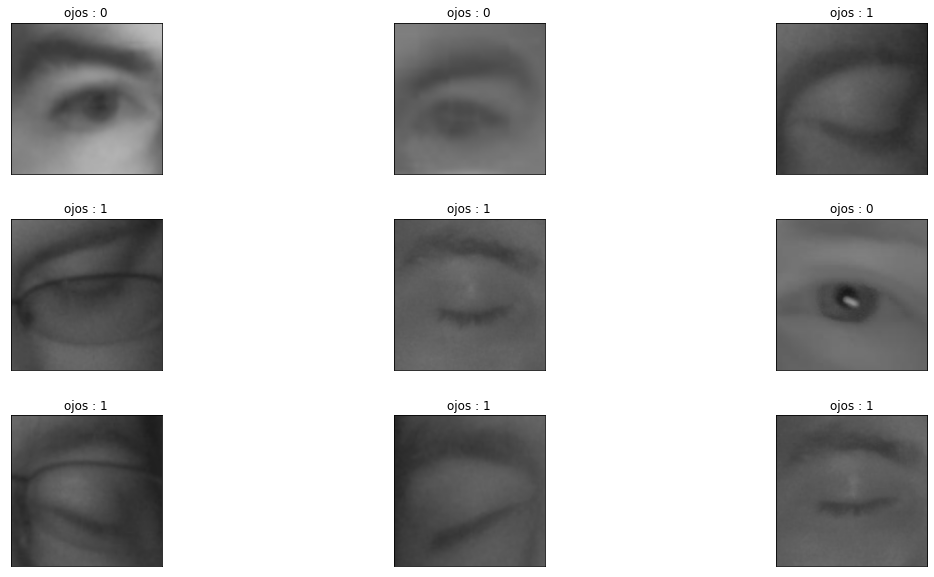

In [10]:
display_rand_images(images, labels)

In [11]:
train_X, test_X, train_Y, test_Y= train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_X.shape)
print("train_labels shape = ",train_Y.shape)
print("\ntest_ds shape = ",test_X.shape)
print("test_labels shape = ",test_Y.shape)

train_ds shape =  (5732, 224, 224, 3)
train_labels shape =  (5732,)

test_ds shape =  (1434, 224, 224, 3)
test_labels shape =  (1434,)


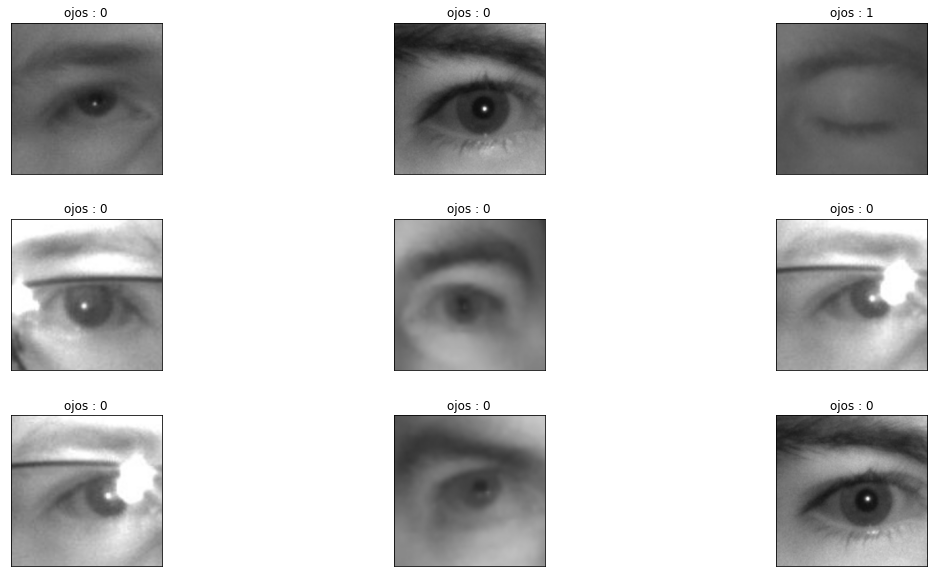

In [12]:
display_rand_images(train_X, train_Y)

In [13]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils


modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(TAMANO_IMG, TAMANO_IMG, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

modeloCNN.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])


Define CNN model

In [14]:
from tensorflow.keras.callbacks import TensorBoard

In [15]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas

# training the model for 10 epochs

history = modeloCNN.fit(train_X, train_Y, batch_size=128,
                validation_split=0.10,
                epochs=25,
                validation_data=(test_X, test_Y))

Epoch 1/25
41/41 [==============================] - 203s 5s/step - loss: 0.4990 - accuracy: 0.7487 - val_loss: 0.1697 - val_accuracy: 0.9286
Epoch 2/25
41/41 [==============================] - 167s 4s/step - loss: 0.1199 - accuracy: 0.9554 - val_loss: 0.0652 - val_accuracy: 0.9756
Epoch 3/25
41/41 [==============================] - 167s 4s/step - loss: 0.0560 - accuracy: 0.9843 - val_loss: 0.0274 - val_accuracy: 0.9948
Epoch 4/25
41/41 [==============================] - 167s 4s/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.0117 - val_accuracy: 0.9983
Epoch 5/25
41/41 [==============================] - 168s 4s/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 0.0092 - val_accuracy: 0.9965
Epoch 6/25
41/41 [==============================] - 167s 4s/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.0192 - val_accuracy: 0.9965
Epoch 7/25
41/41 [==============================] - 167s 4s/step - loss: 0.0294 - accuracy: 0.9932 - val_loss: 0.0085 - val_accuracy: 0.9965
Epoch 8/25
41

In [16]:
_, acc = modeloCNN.evaluate(test_X, test_Y, verbose=0)

print('> %.2f' % (acc * 100.0))

> 99.58


In [17]:
model_probs = modeloCNN.predict(test_X, verbose=0)
# predict crisp classes for test set
model_classes = np.argmax(model_probs,axis=1)
# reduce to 1d array
model_probs = model_probs[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_Y, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(test_Y, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(test_Y, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_Y, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy);
print('F1 score: %.2f' % f1);
print('Precision: %.2f' % precision);
print('Recall: %.2f' % recall);

Accuracy: 45.96
F1 score: 28.94
Precision: 21.12
Recall: 45.96


C:\Users\zambr\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


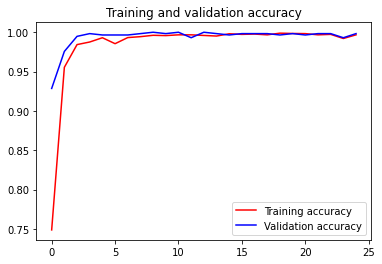

<Figure size 432x288 with 0 Axes>

In [18]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [19]:
modeloCNN.save('./CNNv2.h5')